In [1]:
import gcsfs
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#import seaborn as sns
import cftime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
fs = gcsfs.GCSFileSystem()

mapper = fs.get_mapper("gs://leap-persistent/yiqioyang/cam6_PD_monthly_prec.zarr")
ds_xr = xr.open_dataset(mapper, engine = 'zarr')

param_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/cesm2_ppe_param_set.zarr')
param_xr = xr.open_dataset(param_mapper, engine = 'zarr')

param_df = param_xr.to_pandas()

In [3]:
fs.ls('gs://leap-persistent/kylemcevoy/')

['leap-persistent/kylemcevoy/cesm2_le_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_ppe_param_set.zarr']

In [9]:
quant_mapper = fs.get_mapper('gs://leap-persistent/kylemcevoy/cesm2_le_prec_quantile095.nc')
cesm2_le_q95 = xr.open_dataset(quant_mapper, engine = 'zarr')

In [10]:
cesm2_le_q95

<xarray.Dataset> Size: 4MB
Dimensions:   (ensemble: 10, lat: 192, lon: 288)
Coordinates:
  * ensemble  (ensemble) int64 80B 0 1 2 3 4 5 6 7 8 9
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    quantile  float64 8B ...
Data variables:
    PREC      (ensemble, lat, lon) float64 4MB ...

In [11]:
cesm2_le_q95.lat

<xarray.DataArray 'lat' (lat: 192)> Size: 2kB
array([-90.      , -89.057592, -88.115183, -87.172775, -86.230366, -85.287958,
       -84.34555 , -83.403141, -82.460733, -81.518325, -80.575916, -79.633508,
       -78.691099, -77.748691, -76.806283, -75.863874, -74.921466, -73.979058,
       -73.036649, -72.094241, -71.151832, -70.209424, -69.267016, -68.324607,
       -67.382199, -66.439791, -65.497382, -64.554974, -63.612565, -62.670157,
       -61.727749, -60.78534 , -59.842932, -58.900524, -57.958115, -57.015707,
       -56.073298, -55.13089 , -54.188482, -53.246073, -52.303665, -51.361257,
       -50.418848, -49.47644 , -48.534031, -47.591623, -46.649215, -45.706806,
       -44.764398, -43.82199 , -42.879581, -41.937173, -40.994764, -40.052356,
       -39.109948, -38.167539, -37.225131, -36.282723, -35.340314, -34.397906,
       -33.455497, -32.513089, -31.570681, -30.628272, -29.685864, -28.743455,
       -27.801047, -26.858639, -25.91623 , -24.973822, -24.031414, -23.089005,
       -22.146597, -21.204188, -20.26178 , -19.319372, -18.376963, -17.434555,
       -16.492147, -15.549738, -14.60733 , -13.664921, -12.722513, -11.780105,
       -10.837696,  -9.895288,  -8.95288 ,  -8.010471,  -7.068063,  -6.125654,
        -5.183246,  -4.240838,  -3.298429,  -2.356021,  -1.413613,  -0.471204,
         0.471204,   1.413613,   2.356021,   3.298429,   4.240838,   5.183246,
         6.125654,   7.068063,   8.010471,   8.95288 ,   9.895288,  10.837696,
        11.780105,  12.722513,  13.664921,  14.60733 ,  15.549738,  16.492147,
        17.434555,  18.376963,  19.319372,  20.26178 ,  21.204188,  22.146597,
        23.089005,  24.031414,  24.973822,  25.91623 ,  26.858639,  27.801047,
        28.743455,  29.685864,  30.628272,  31.570681,  32.513089,  33.455497,
        34.397906,  35.340314,  36.282723,  37.225131,  38.167539,  39.109948,
        40.052356,  40.994764,  41.937173,  42.879581,  43.82199 ,  44.764398,
        45.706806,  46.649215,  47.591623,  48.534031,  49.47644 ,  50.418848,
        51.361257,  52.303665,  53.246073,  54.188482,  55.13089 ,  56.073298,
        57.015707,  57.958115,  58.900524,  59.842932,  60.78534 ,  61.727749,
        62.670157,  63.612565,  64.554974,  65.497382,  66.439791,  67.382199,
        68.324607,  69.267016,  70.209424,  71.151832,  72.094241,  73.036649,
        73.979058,  74.921466,  75.863874,  76.806283,  77.748691,  78.691099,
        79.633508,  80.575916,  81.518325,  82.460733,  83.403141,  84.34555 ,
        85.287958,  86.230366,  87.172775,  88.115183,  89.057592,  90.      ])
Coordinates:
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    quantile  float64 8B ...
Attributes:
    long_name:  latitude
    units:      degrees_north

In [12]:
ds_dask = ds_xr.chunk({'ensemble': 262, 'time': 36, 'lat': 24, 'lon': 32})

In [13]:
ds_dask['PRECC']

<xarray.DataArray 'PRECC' (ensemble: 262, time: 36, lat: 192, lon: 288)> Size: 2GB
dask.array<xarray-PRECC, shape=(262, 36, 192, 288), dtype=float32, chunksize=(262, 36, 24, 32), chunktype=numpy.ndarray>
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Attributes:
    cell_methods:  time: mean
    long_name:     Convective precipitation rate (liq + ice)
    units:         m/s

In [14]:
ds_dask2 = ds_dask['PRECC'] + ds_dask['PRECL']

In [15]:
ds_prec = ds_dask2.compute()

In [16]:
cesm2_le_q95

<xarray.Dataset> Size: 4MB
Dimensions:   (ensemble: 10, lat: 192, lon: 288)
Coordinates:
  * ensemble  (ensemble) int64 80B 0 1 2 3 4 5 6 7 8 9
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    quantile  float64 8B ...
Data variables:
    PREC      (ensemble, lat, lon) float64 4MB ...

In [17]:
ppe_prec_quant95 = ds_prec.quantile(0.95, dim = 'time')

In [18]:
cesm2_le_q95['lat'] = ppe_prec_quant95['lat']

In [19]:
np.max(cesm2_le_q95.lat.values - ppe_prec_quant95.lat.values)

0.0

In [21]:
np.max(ppe_prec_quant95.lon.values - cesm2_le_q95.lon.values)

0.0

In [22]:
upper_bnd = np.max([np.max(cesm2_le_q95['PREC'].mean(dim = 'ensemble').values), np.max(ppe_prec_quant95.mean(dim = 'ensemble')).values])

In [23]:
std_upper_bnd = np.max([np.max(ppe_prec_quant95.std(dim='ensemble').values),
                        np.max(cesm2_le_q95['PREC'].std(dim='ensemble').values)])

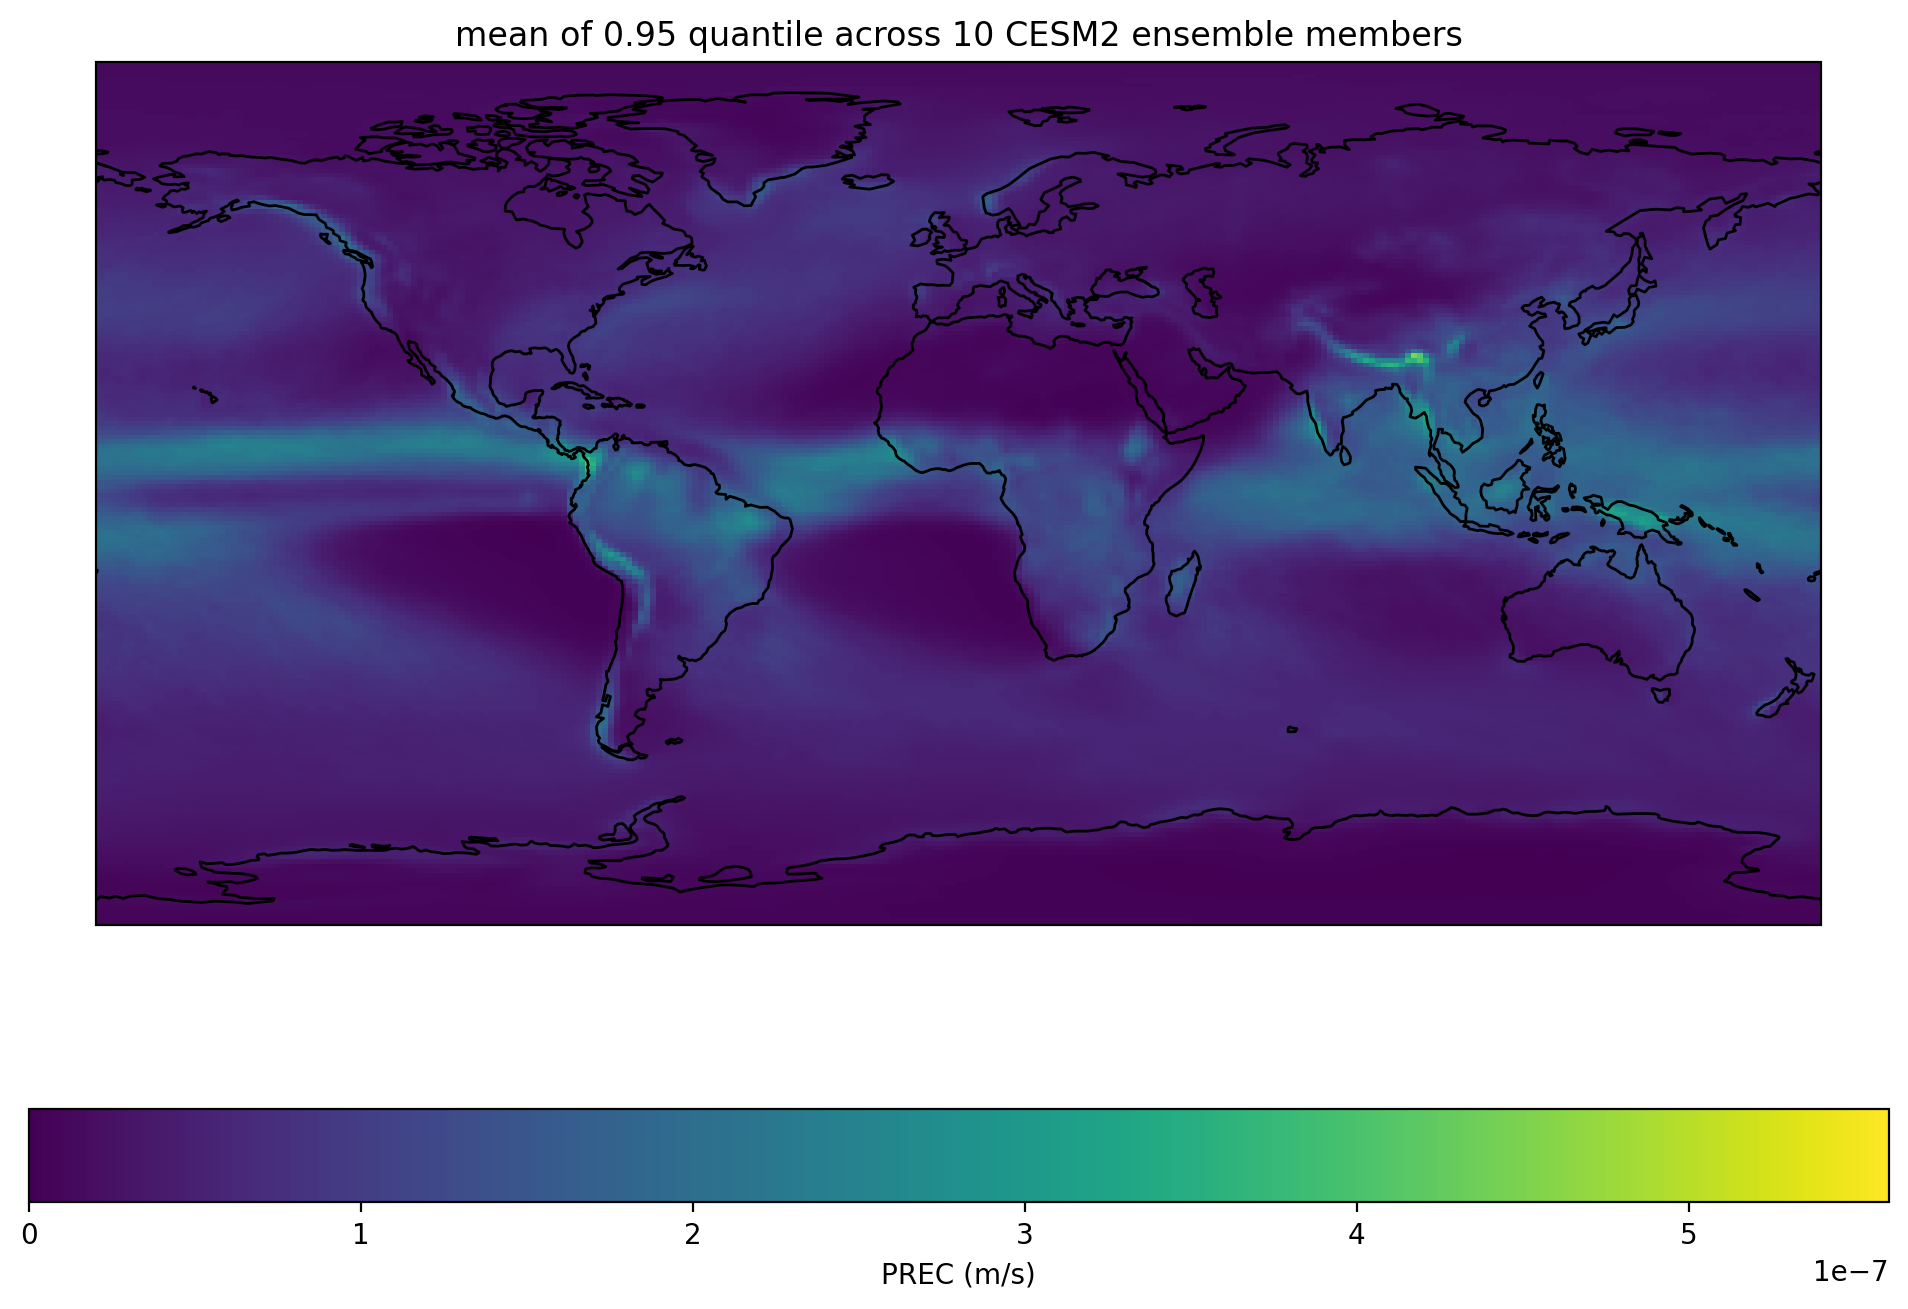

In [29]:
cesm_quant_plot_mean = (cesm2_le_q95['PREC'].mean(dim ='ensemble').
                   plot(figsize=(12, 8),
                        vmin = 0,
                        vmax = upper_bnd,
                        subplot_kws={'transform': ccrs.PlateCarree(),
                                     'projection': ccrs.PlateCarree()},
                        cbar_kwargs={'orientation': 'horizontal',
                                    'label': 'PREC (m/s)'}))
cesm_quant_plot_mean.axes.coastlines()
plt.title('mean of 0.95 quantile across 10 CESM2 ensemble members');
plt.savefig('cesm2_le_prec_mean_095_quantile_plot.png')

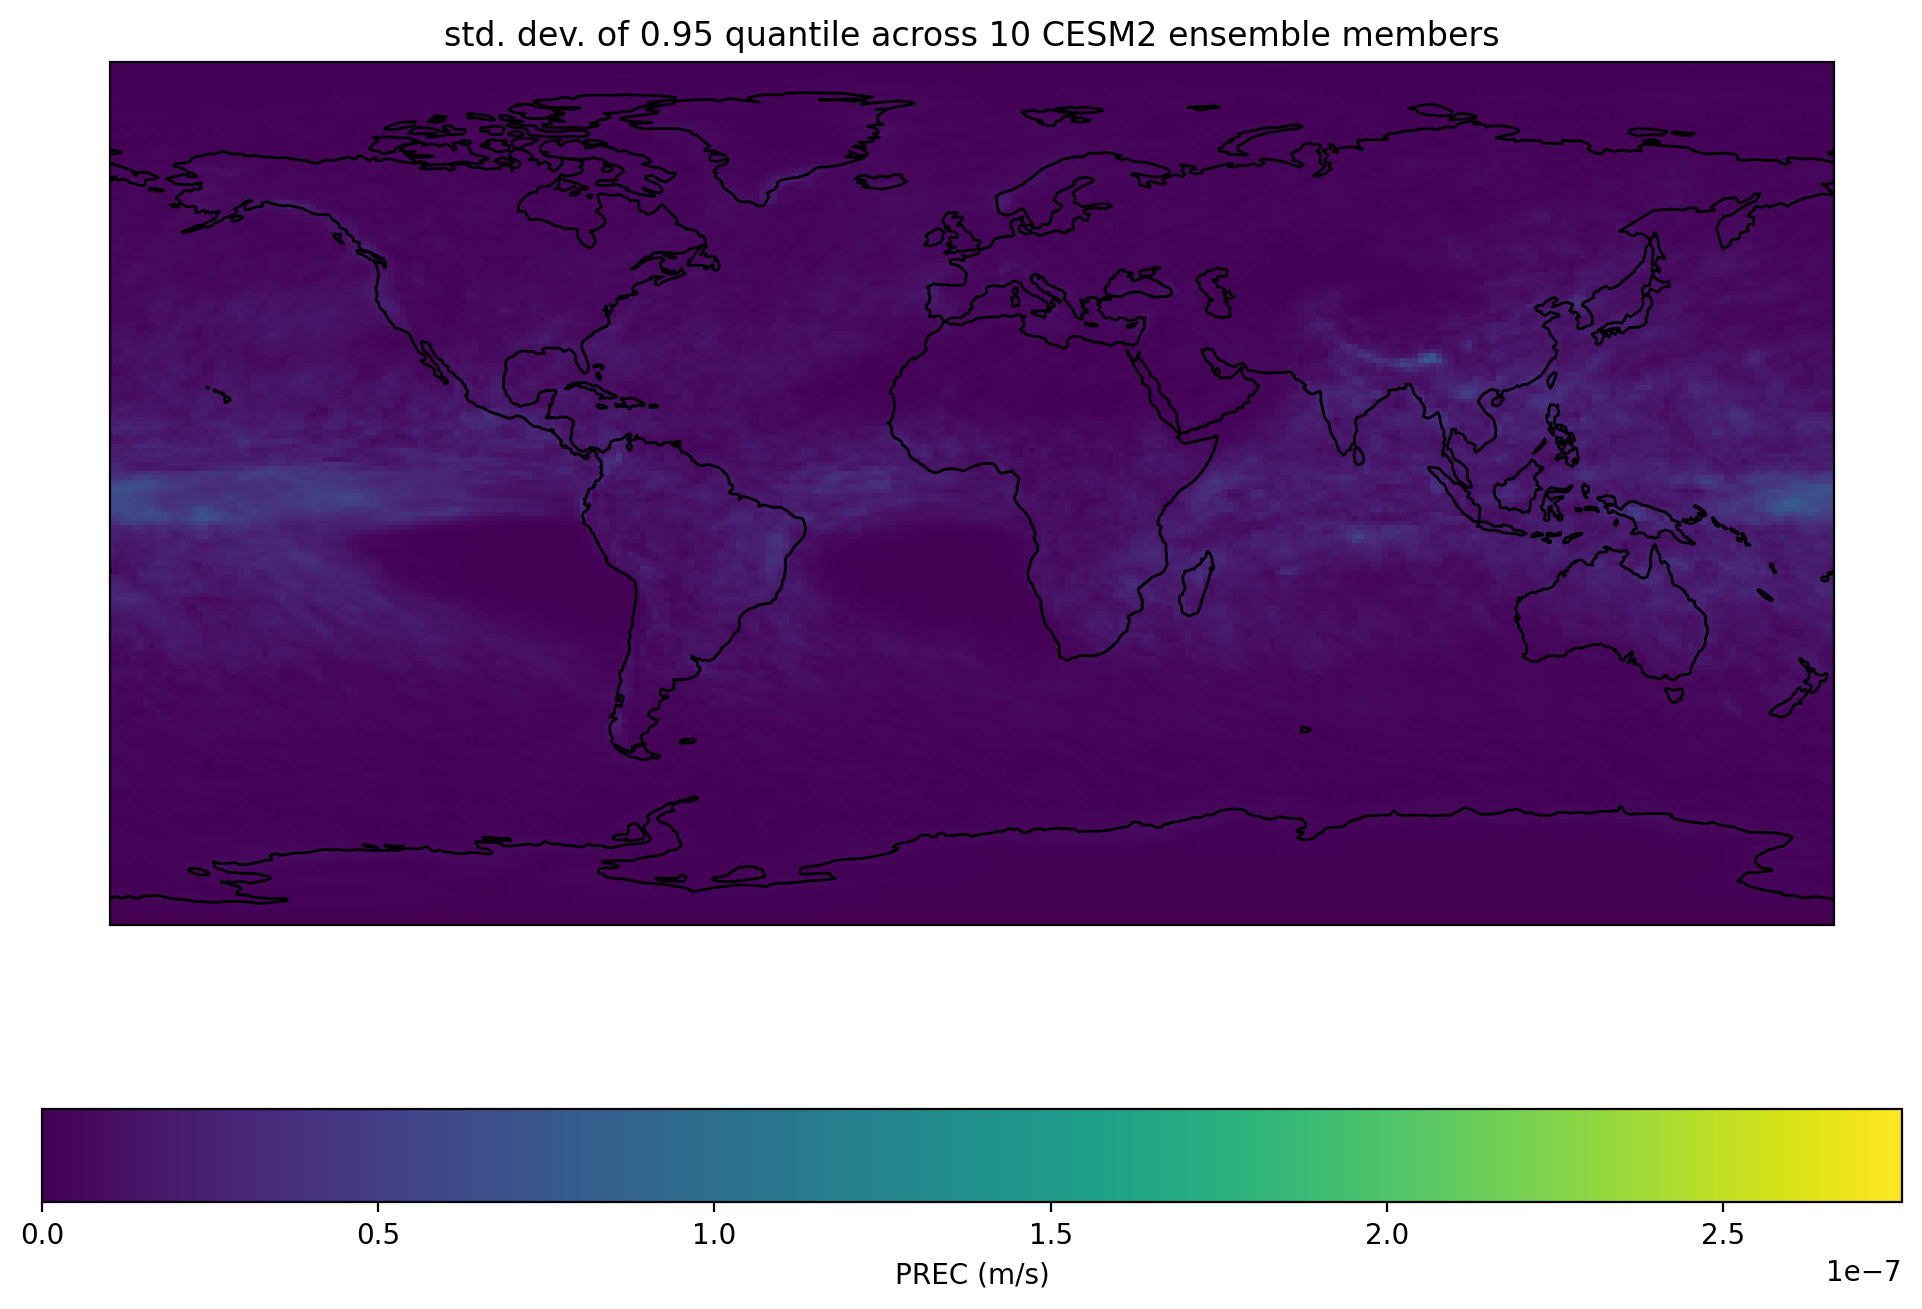

In [30]:
cesm2_quant_plot_std = (cesm2_le_q95['PREC'].std(dim='ensemble').
              plot(figsize=(12, 8),
                   vmin = 0,
                   vmax = std_upper_bnd,
                   subplot_kws={'transform': ccrs.PlateCarree(),
                                'projection': ccrs.PlateCarree()},
                   cbar_kwargs={'orientation': 'horizontal',
                               'label': 'PREC (m/s)'}))
cesm2_quant_plot_std.axes.coastlines()
plt.title('std. dev. of 0.95 quantile across 10 CESM2 ensemble members');
plt.savefig('cesm2_prec_std_095_quantile_plot.png')

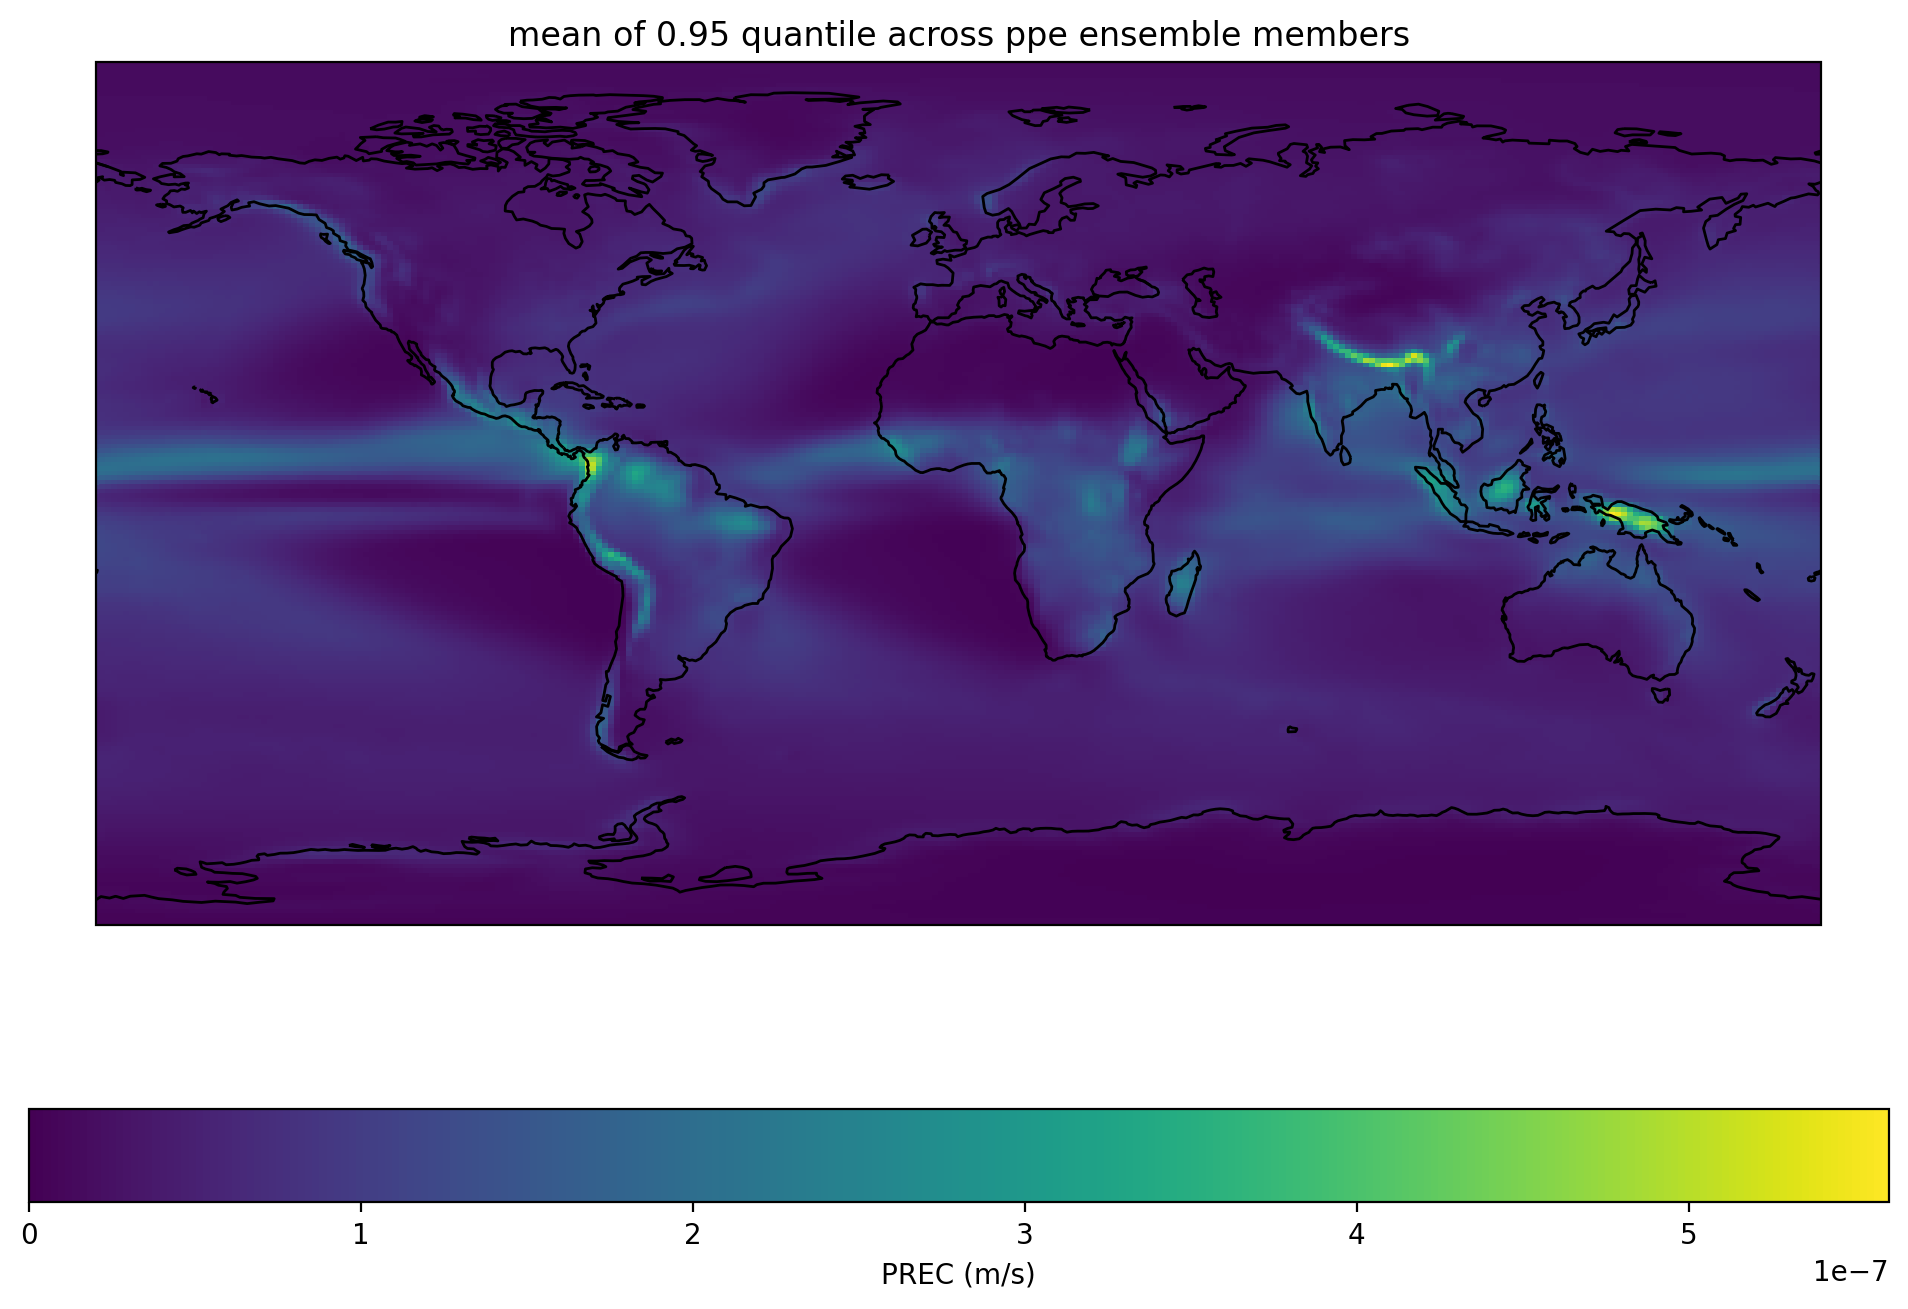

In [31]:
quant_plot_mean = (ppe_prec_quant95.mean(dim ='ensemble').
                   plot(figsize=(12, 8),
                        vmin = 0,
                        vmax = upper_bnd,
                        subplot_kws={'transform': ccrs.PlateCarree(),
                                     'projection': ccrs.PlateCarree()},
                        cbar_kwargs={'orientation': 'horizontal',
                                    'label': 'PREC (m/s)'}))
quant_plot_mean.axes.coastlines()
plt.title('mean of 0.95 quantile across ppe ensemble members');
plt.savefig('ppe_prec_mean_095_quantile_plot.png')

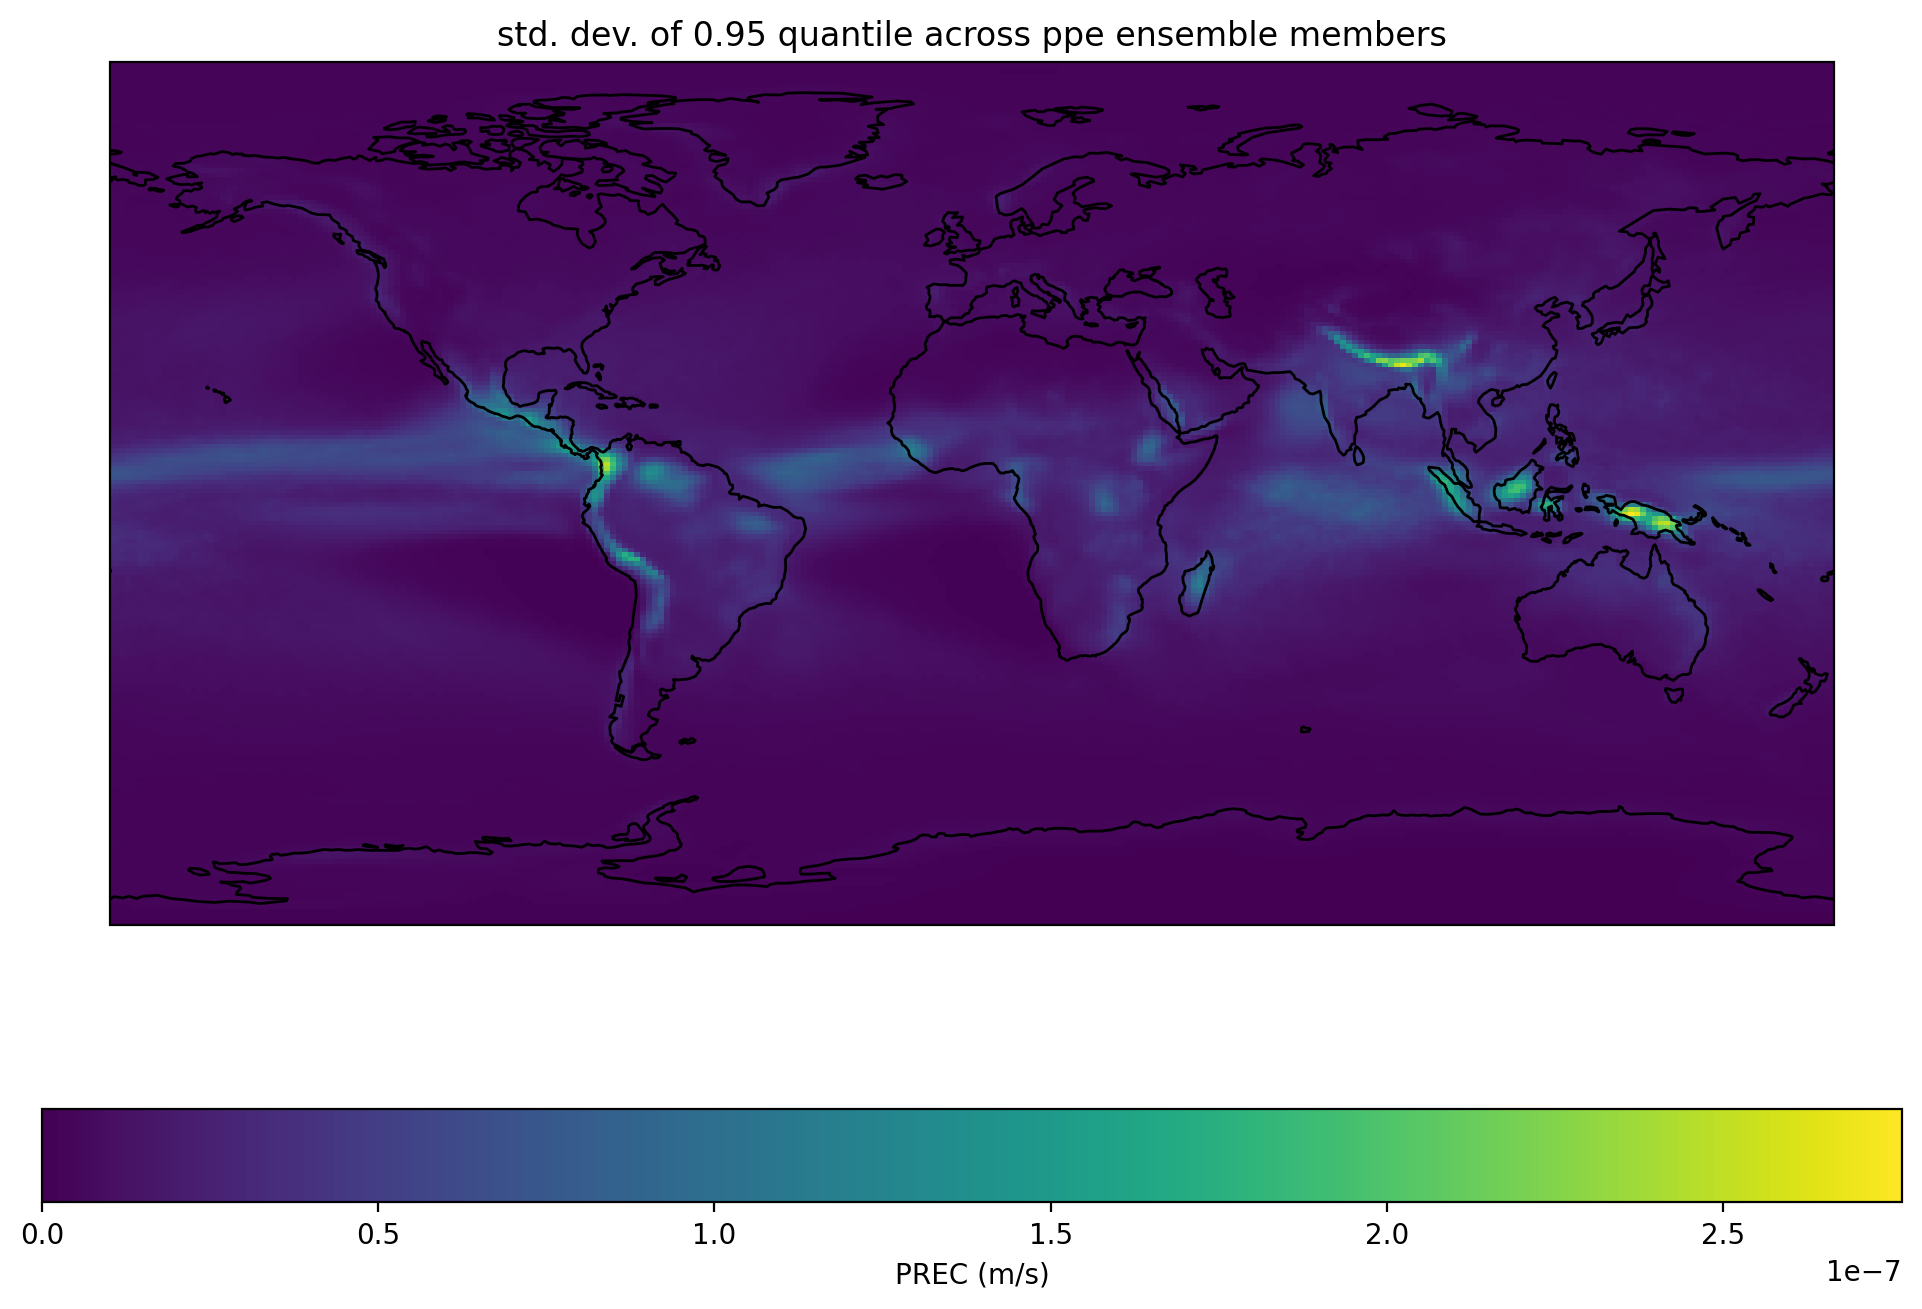

In [32]:
quant_plot_std = (ppe_prec_quant95.std(dim='ensemble').
              plot(figsize=(12, 8),
                   vmin = 0,
                   vmax = std_upper_bnd,
                   subplot_kws={'transform': ccrs.PlateCarree(),
                                'projection': ccrs.PlateCarree()},
                   cbar_kwargs={'orientation': 'horizontal',
                               'label': 'PREC (m/s)'}))
quant_plot_std.axes.coastlines()
plt.title('std. dev. of 0.95 quantile across ppe ensemble members');
plt.savefig('ppe_prec_std_095_quantile_plot.png')

In [13]:
cesm2_le_q95

<xarray.Dataset> Size: 4MB
Dimensions:   (ensemble: 10, lat: 192, lon: 288)
Coordinates:
  * ensemble  (ensemble) int64 80B 0 1 2 3 4 5 6 7 8 9
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    quantile  float64 8B ...
Data variables:
    PREC      (ensemble, lat, lon) float64 4MB 5.085e-09 5.085e-09 ... 1.162e-08

In [25]:
quant95_mean_diff = ppe_prec_quant95.mean(dim='ensemble') - cesm2_le_q95.mean(dim = 'ensemble')

In [24]:
quant95_std_ratio =  ppe_prec_quant95.std(dim='ensemble') / cesm2_le_q95.std(dim = 'ensemble')

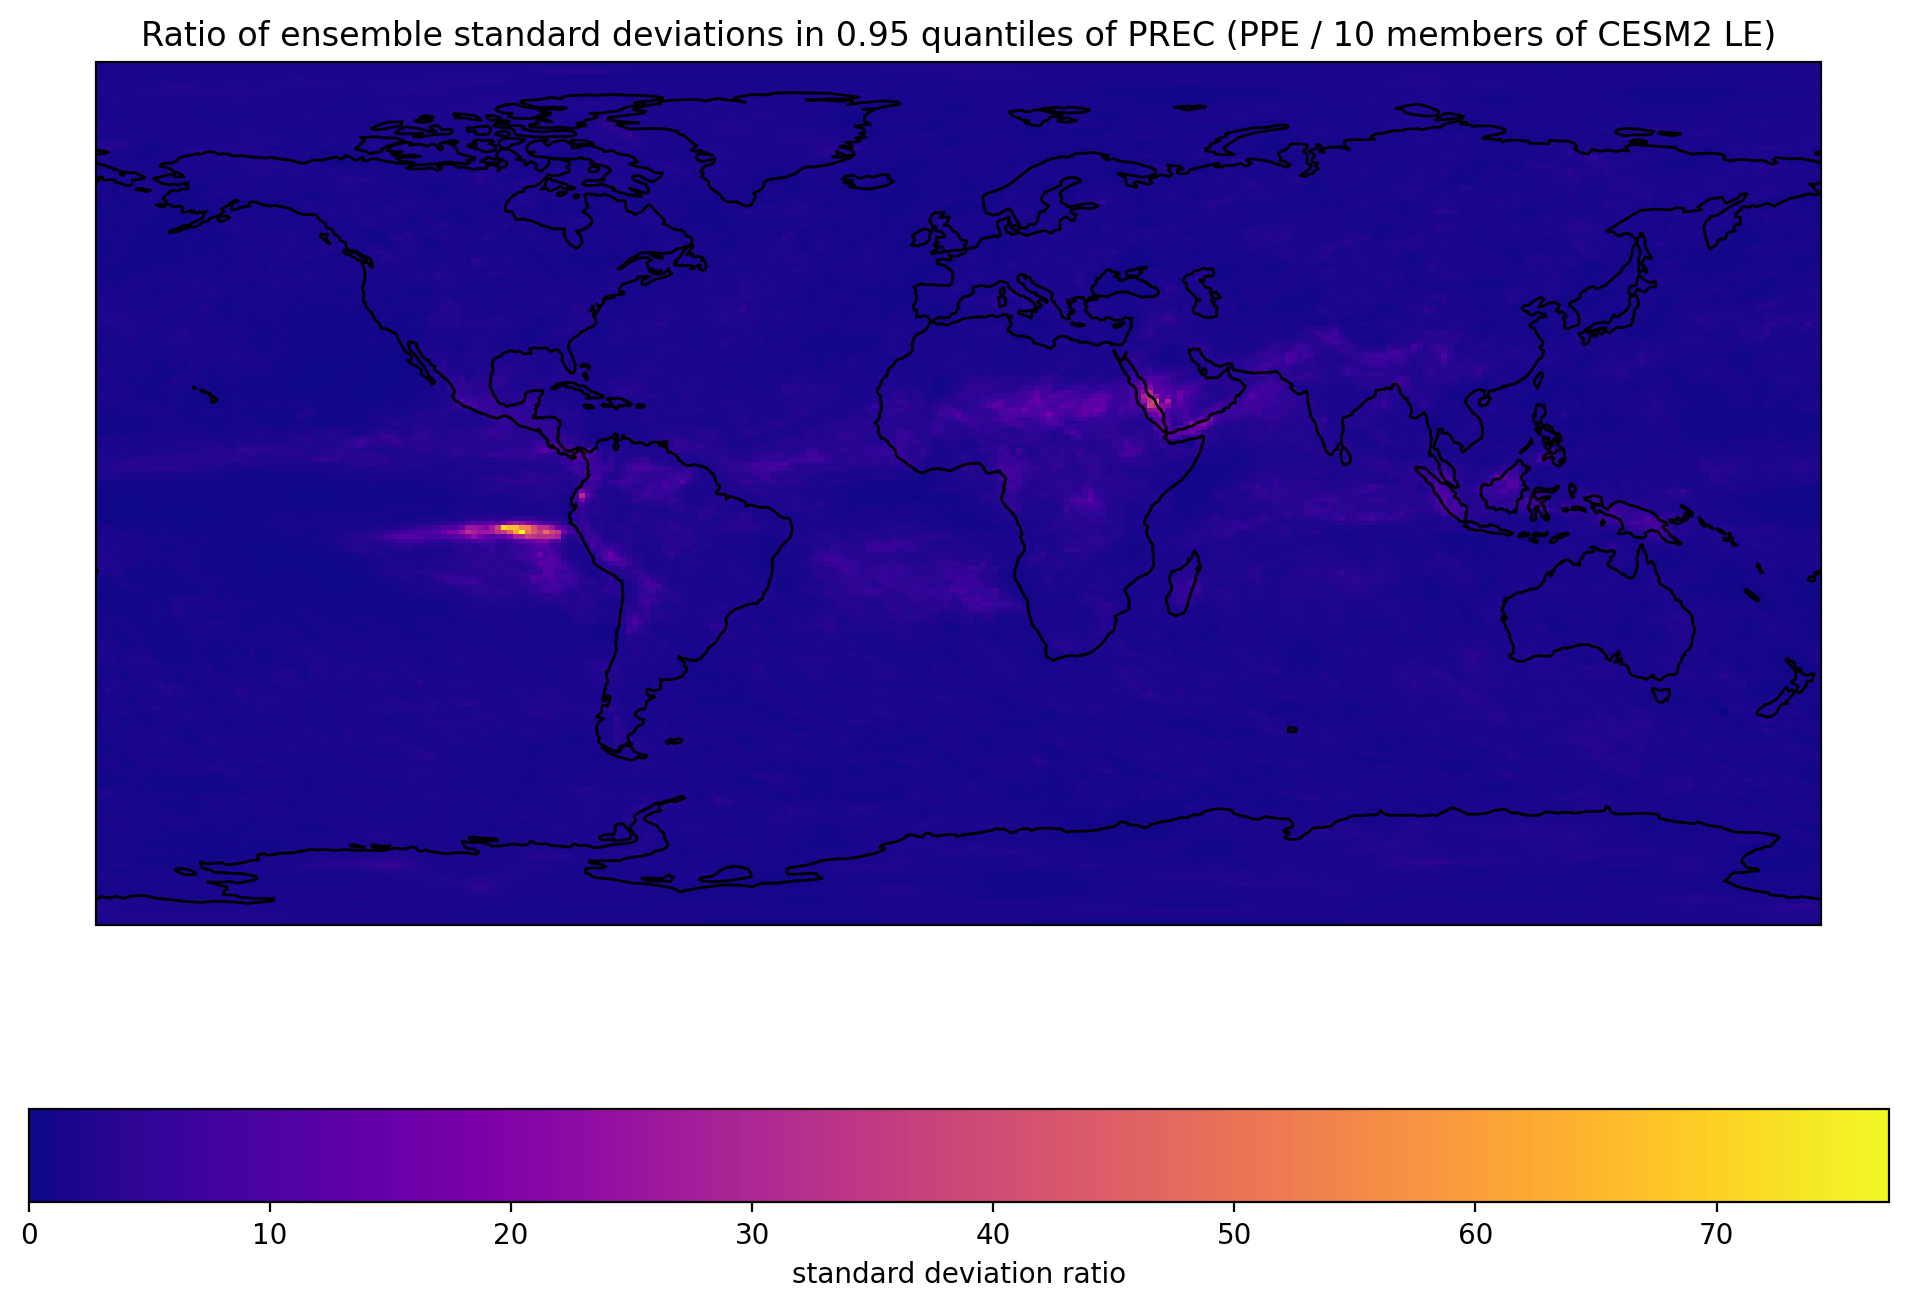

In [35]:
quant_plot_std_ratio = (quant95_std_ratio['PREC'].
              plot(figsize=(12, 8),
                   vmin = 0,
                   cmap = 'plasma',
                   subplot_kws={'transform': ccrs.PlateCarree(),
                                'projection': ccrs.PlateCarree()},
                   cbar_kwargs={'orientation': 'horizontal',
                               'label': 'standard deviation ratio'}))
quant_plot_std_ratio.axes.coastlines()
plt.title('Ratio of ensemble standard deviations in 0.95 quantiles of PREC (PPE / 10 members of CESM2 LE)');
plt.savefig('prec_std_ratio_095_quantile_plot.png')

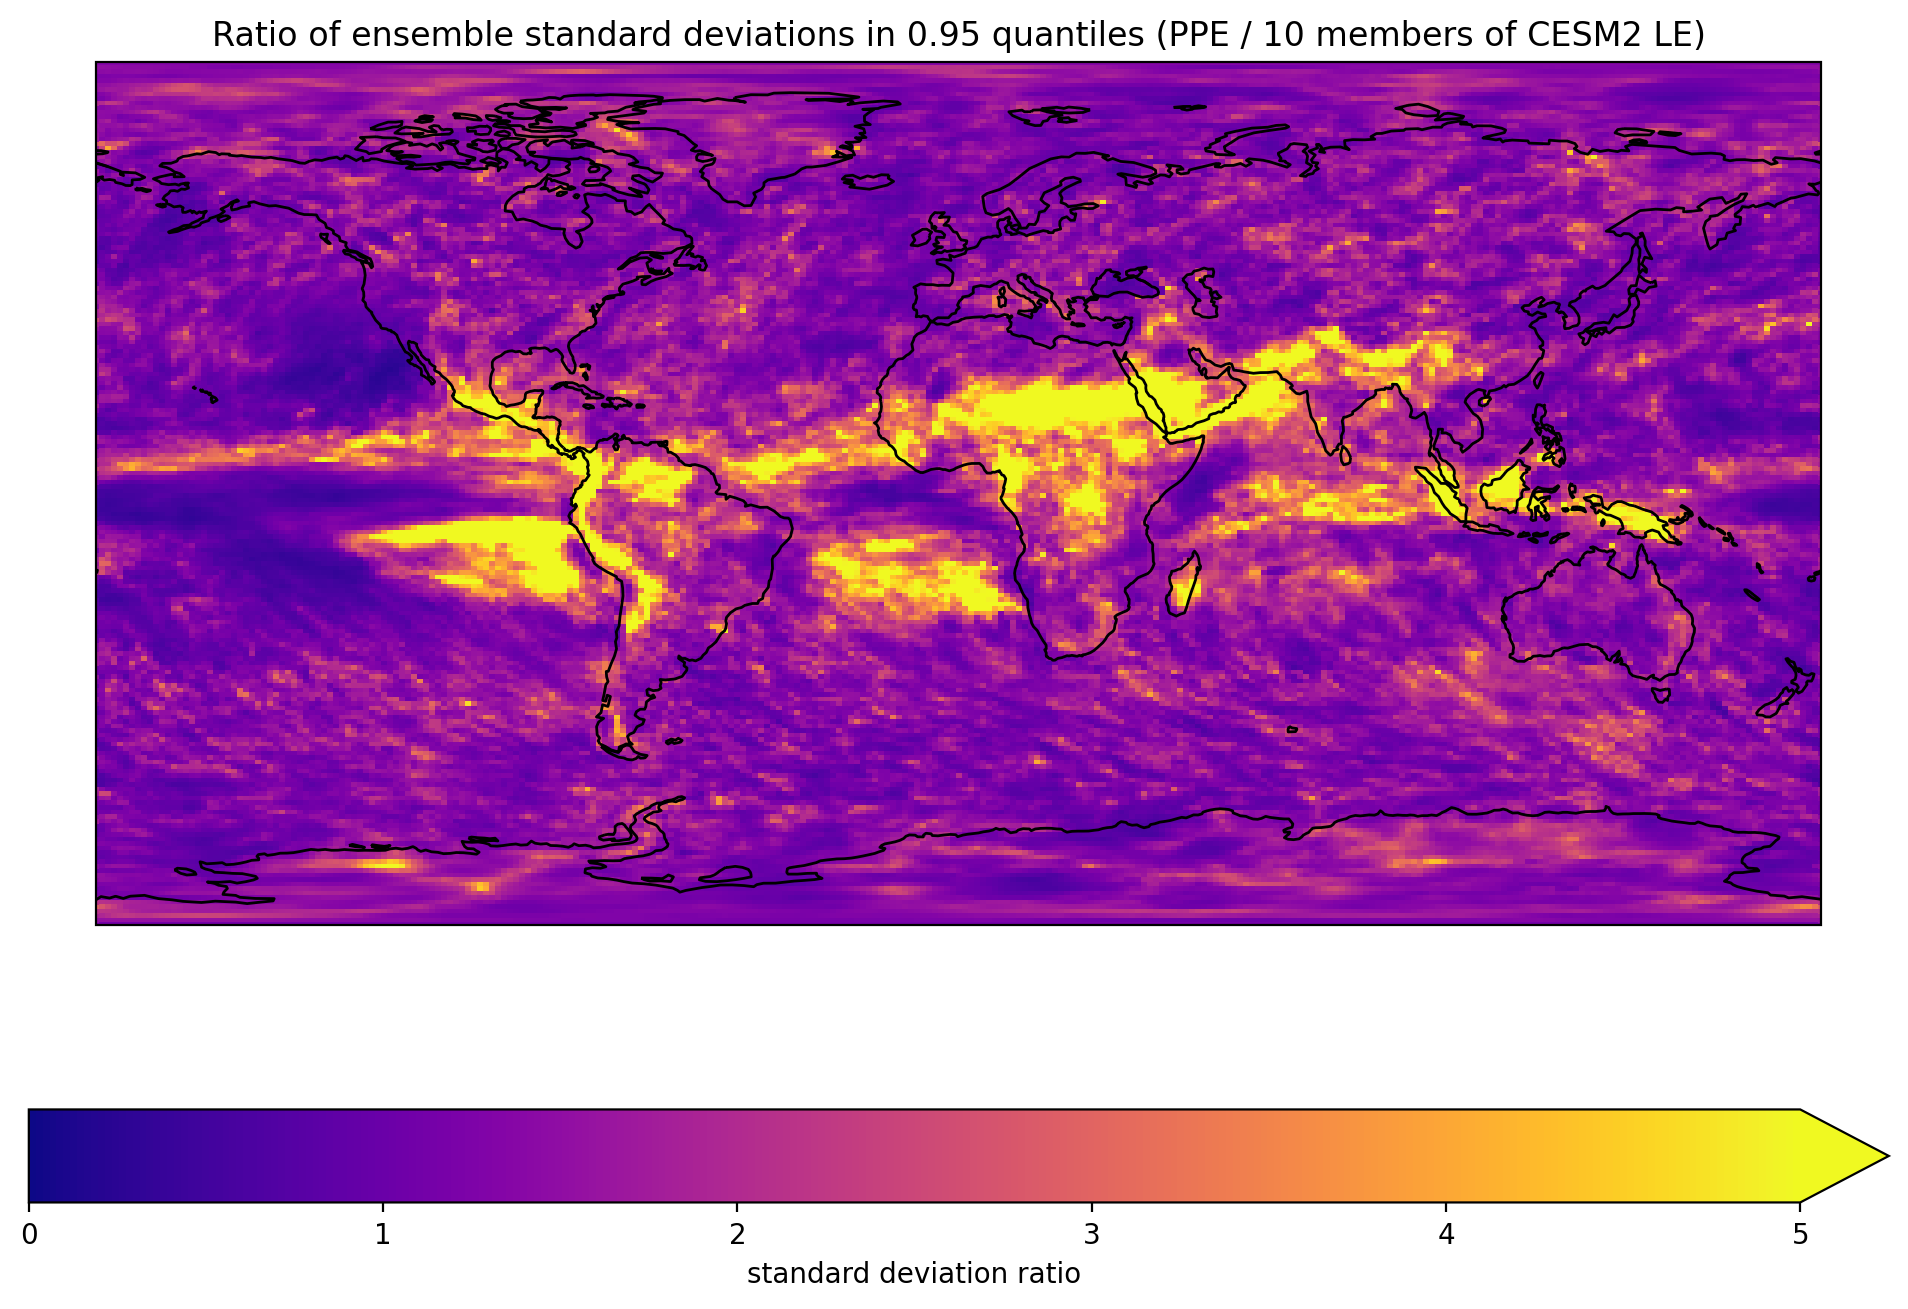

In [36]:
quant_plot_std_ratio_cl = (quant95_std_ratio['PREC'].
              plot(figsize=(12, 8),
                   cmap = 'plasma',
                   vmin = 0,
                   vmax = 5,
                   subplot_kws={'transform': ccrs.PlateCarree(),
                                'projection': ccrs.PlateCarree()},
                   cbar_kwargs={'orientation': 'horizontal',
                               'label': 'standard deviation ratio'}))
quant_plot_std_ratio_cl.axes.coastlines()
plt.title('Ratio of ensemble standard deviations in 0.95 quantiles (PPE / 10 members of CESM2 LE)');
plt.savefig('prec_std_ratio_095_quantile_plot_cl.png')

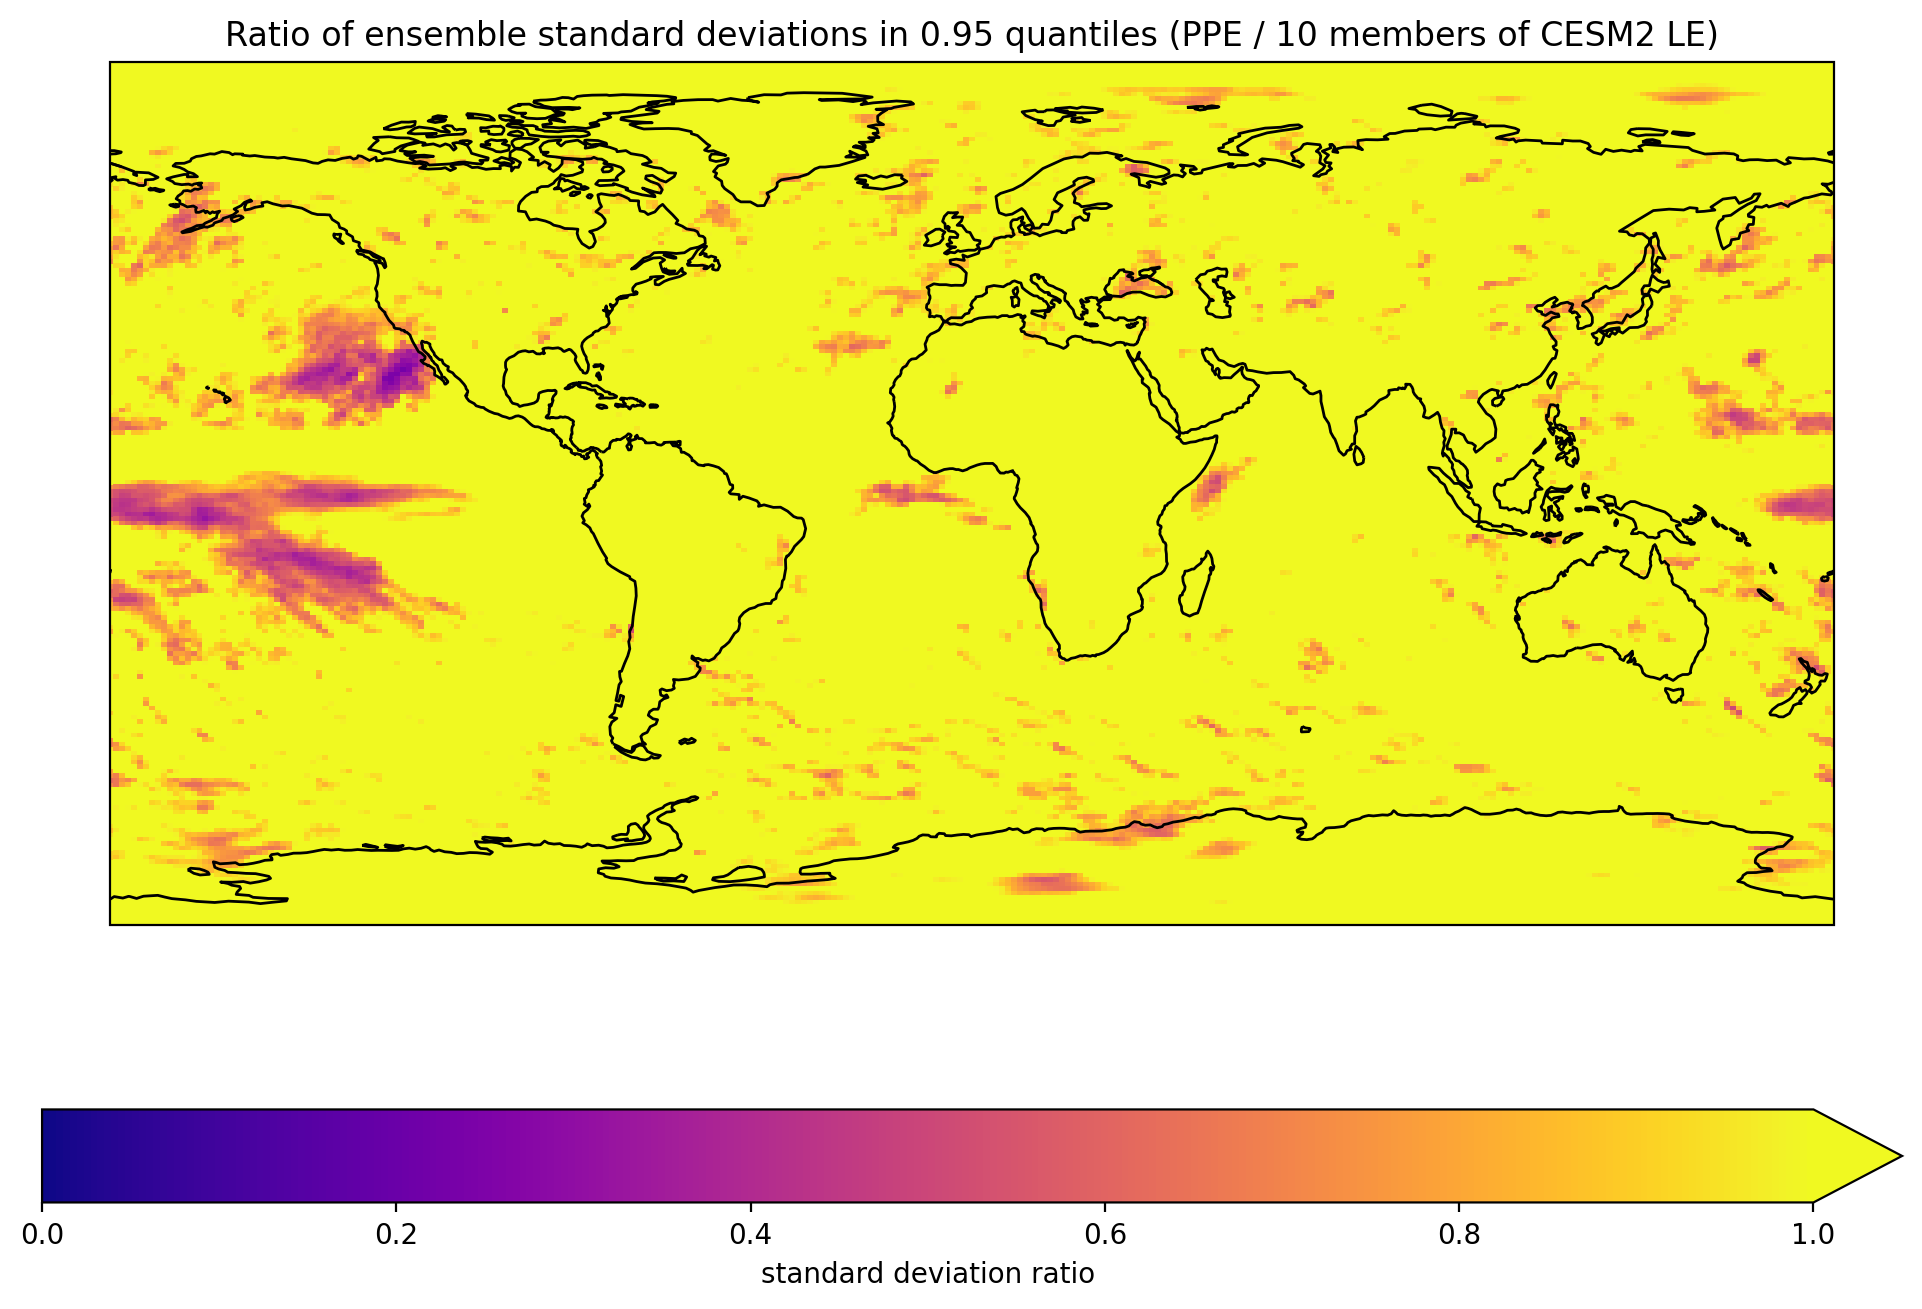

In [37]:
quant_plot_std_ratio_capped = (quant95_std_ratio['PREC'].
              plot(figsize=(12, 8),
                   cmap = 'plasma',
                   vmin = 0,
                   vmax = 1,
                   subplot_kws={'transform': ccrs.PlateCarree(),
                                'projection': ccrs.PlateCarree()},
                   cbar_kwargs={'orientation': 'horizontal',
                               'label': 'standard deviation ratio'}))
quant_plot_std_ratio_capped.axes.coastlines()
plt.title('Ratio of ensemble standard deviations in 0.95 quantiles (PPE / 10 members of CESM2 LE)');
plt.savefig('prec_std_ratio_095_quantile_plot_capped1.png')

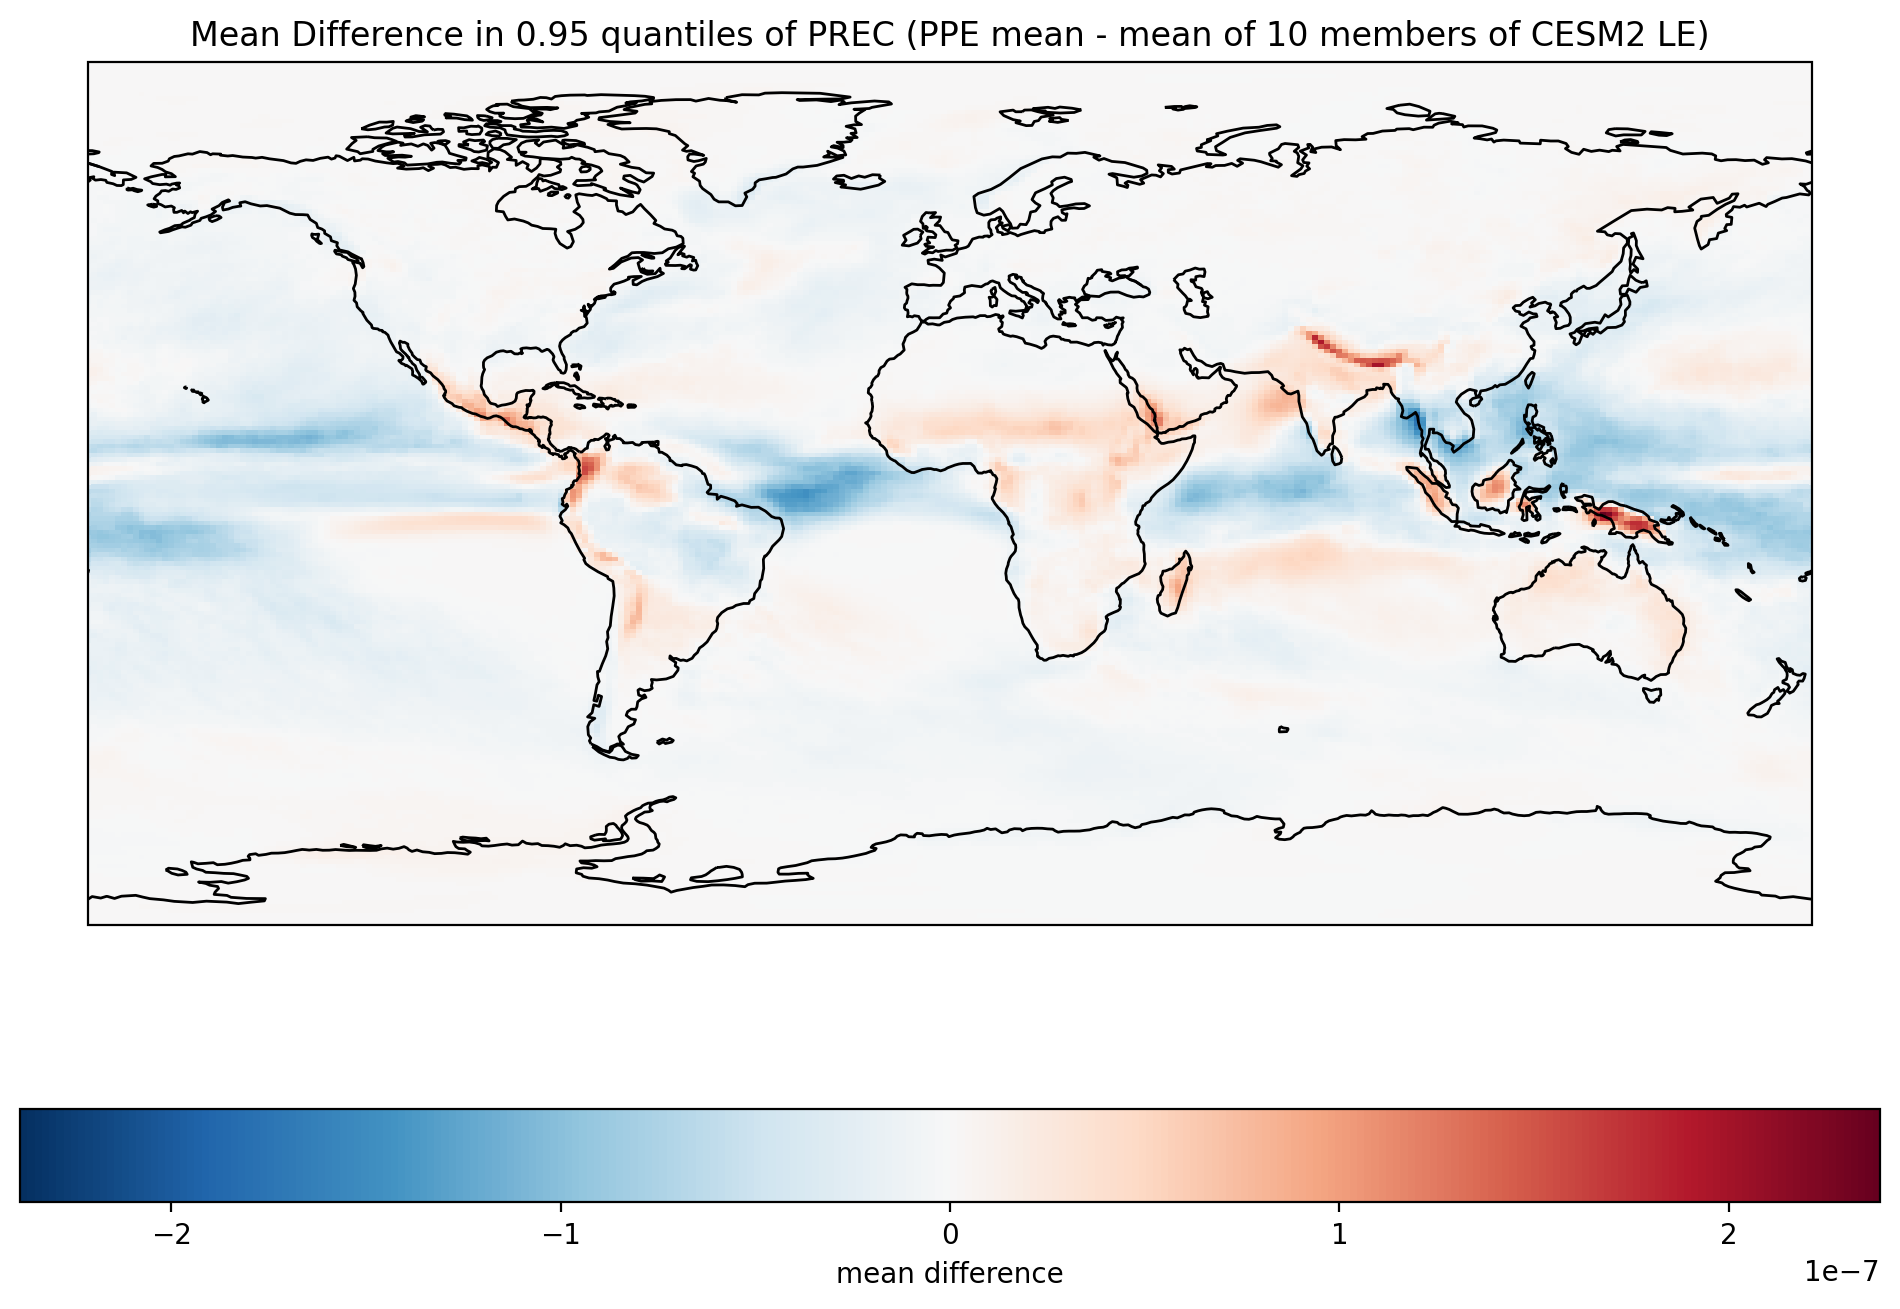

In [38]:
quant_plot_mean_diff = (quant95_mean_diff['PREC'].
              plot(figsize=(12, 8),
                   cmap = 'RdBu_r',
                   vmin = -np.max(quant95_mean_diff['PREC']),
                   vmax = np.max(quant95_mean_diff['PREC']),
                   subplot_kws={'transform': ccrs.PlateCarree(),
                                'projection': ccrs.PlateCarree()},
                   cbar_kwargs={'orientation': 'horizontal',
                               'label': 'mean difference'}))
quant_plot_mean_diff.axes.coastlines()
plt.title('Mean Difference in 0.95 quantiles of PREC (PPE mean - mean of 10 members of CESM2 LE)');
plt.savefig('mean_diff_095_quantile_plot.png')

In [16]:
quant95_mean_diff['PREC']

<xarray.DataArray 'PREC' (lat: 95, lon: 288)> Size: 219kB
array([[3.28184520e-10, 3.28173795e-10, 3.28153707e-10, ...,
        3.28188544e-10, 3.28179740e-10, 3.28187379e-10],
       [3.11078727e-10, 3.00029482e-10, 2.91467325e-10, ...,
        3.33939586e-10, 3.28644459e-10, 3.21713481e-10],
       [6.71438169e-11, 5.28717162e-11, 3.75556474e-11, ...,
        8.25459785e-11, 7.83095799e-11, 7.44645739e-11],
       ...,
       [1.51240235e-09, 1.48792903e-09, 1.41838169e-09, ...,
        1.61938141e-09, 1.57530715e-09, 1.54655960e-09],
       [8.85714912e-10, 8.65651176e-10, 8.35698309e-10, ...,
        1.00284534e-09, 9.54699588e-10, 9.09017387e-10],
       [1.03820321e-09, 1.03753576e-09, 1.03667912e-09, ...,
        1.03696087e-09, 1.03430375e-09, 1.03783334e-09]])
Coordinates:
  * lat       (lat) float64 760B -90.0 -89.06 -88.12 -87.17 ... 86.23 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    quantile  float64 8B 0.95

In [26]:
np.min(quant95_std_ratio['PREC'])

<xarray.DataArray 'PREC' ()> Size: 8B
array(0.22565053)
Coordinates:
    quantile  float64 8B 0.95

In [27]:
ensemble_sd = ppe_prec_quant95.std('ensemble')

In [28]:
ensemble_sd = ensemble_sd.rename('prec_sd')

In [29]:
quant95_std_ratio

<xarray.Dataset> Size: 446kB
Dimensions:   (lat: 192, lon: 288)
Coordinates:
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    quantile  float64 8B 0.95
Data variables:
    PREC      (lat, lon) float64 442kB 1.149 1.149 1.149 ... 1.33 1.328 1.328

In [31]:
stacked_q95 = (quant95_std_ratio['PREC'].where(quant95_std_ratio['PREC'] > 5, drop = True).
     stack(x = ['lat', 'lon']))
extreme_coords = stacked_q95[stacked_q95.notnull()].x.values

In [21]:
extreme_coords[0][0]

-77.74869109947645

In [22]:
1 / 36

0.027777777777777776

In [23]:
test_lat, test_lon = extreme_coords[0]

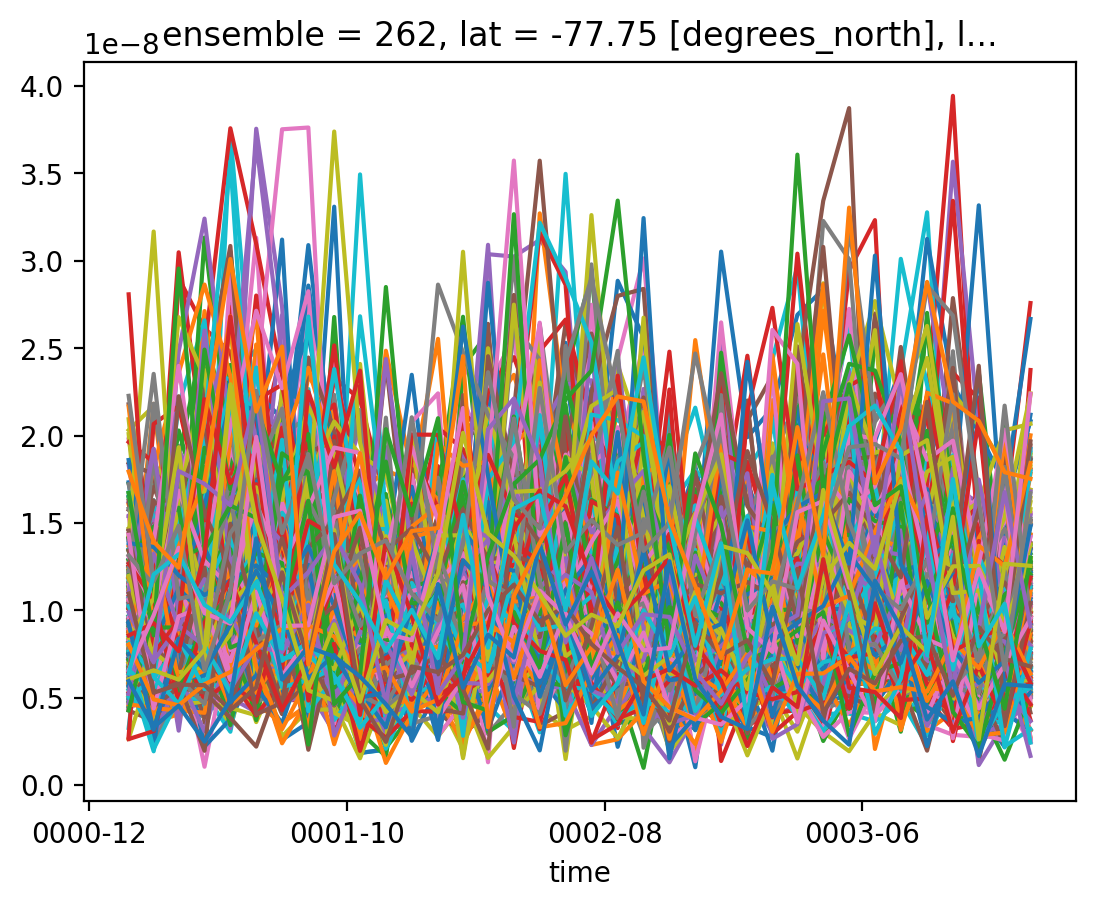

In [24]:
for ens in ds_prec.ensemble:
    ds_prec.sel(ensemble = ens, lat = test_lat, lon = test_lon).plot()

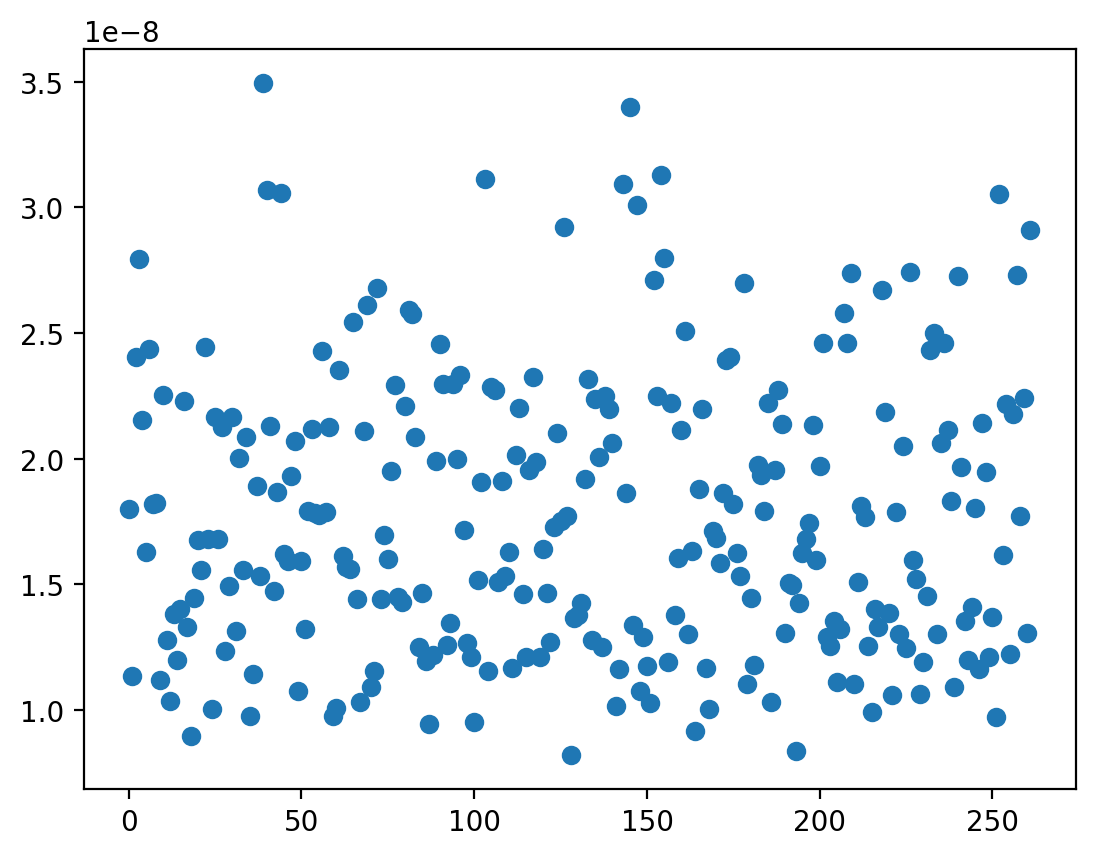

In [25]:
plt.scatter(np.arange(0, 262), ppe_prec_quant95.sel(lat = test_lat, lon = test_lon).values)

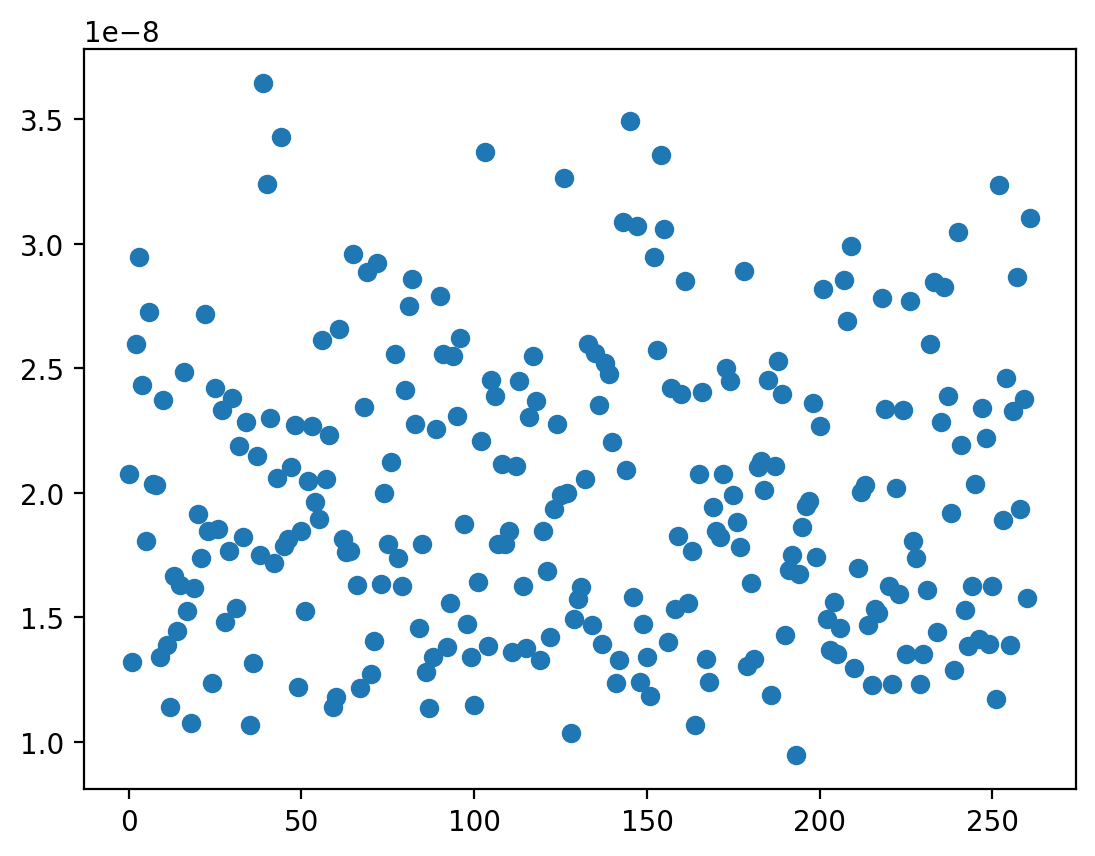

In [26]:
plt.scatter(np.arange(0, 262), ppe_prec_quant95.sel(lat = extreme_coords[1][0], lon = extreme_coords[1][1]).values)

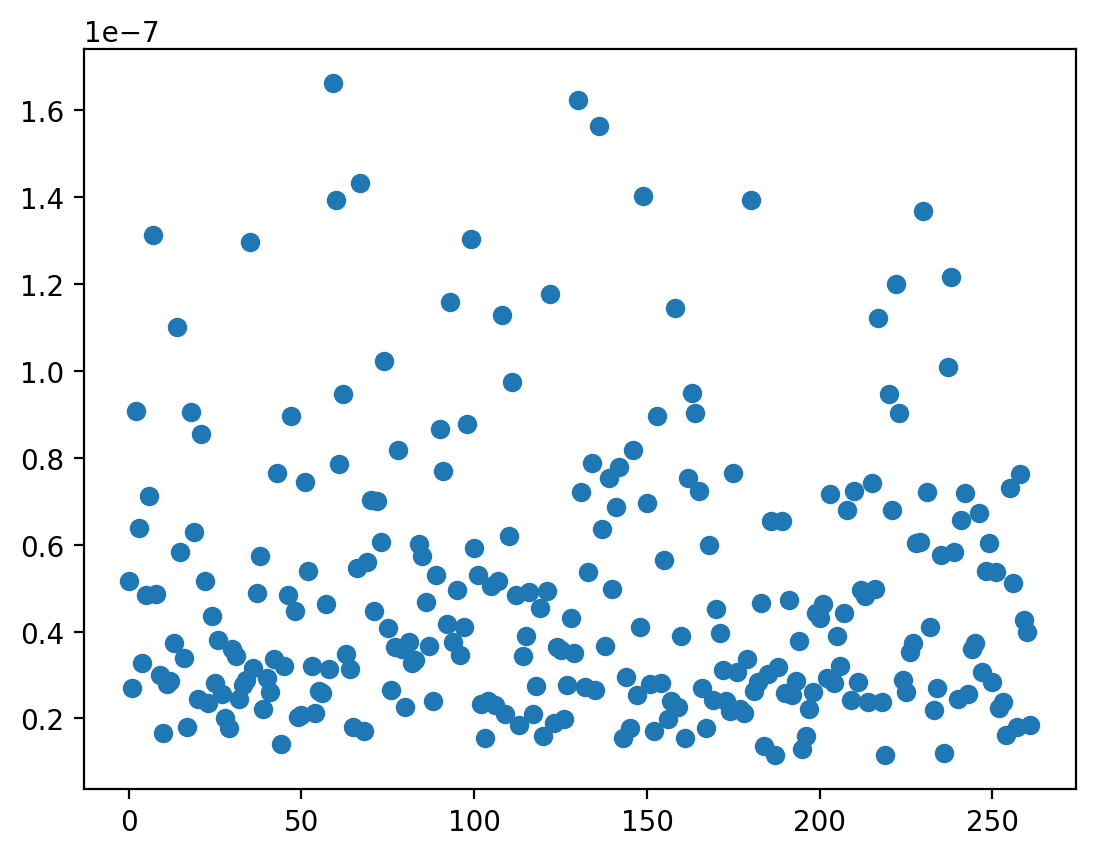

In [27]:
plt.scatter(np.arange(0, 262),
            ppe_prec_quant95.sel(lat = extreme_coords[2][0], lon = extreme_coords[2][1]).values)

In [28]:
np.where(ppe_prec_quant95.sel(lat = extreme_coords[2][0], lon = extreme_coords[2][1]).values > 1.4e-7)

(array([ 59,  67, 130, 136, 149]),)

In [29]:
np.where(ppe_prec_quant95.sel(lat = extreme_coords[0][0], lon = extreme_coords[0][1]).values > 3e-8)

(array([ 39,  40,  44, 103, 143, 145, 147, 154, 252]),)

In [30]:
test_ensembles = np.where(ppe_prec_quant95.sel(lat = extreme_coords[1][0], lon = extreme_coords[1][1]).values > 3e-8)

In [31]:
param_df = param_df.drop(columns = 'Sample_nmb')

In [32]:
param_df_std = (param_df - param_df.min()) / (param_df.max() - param_df.min())

<Axes: >

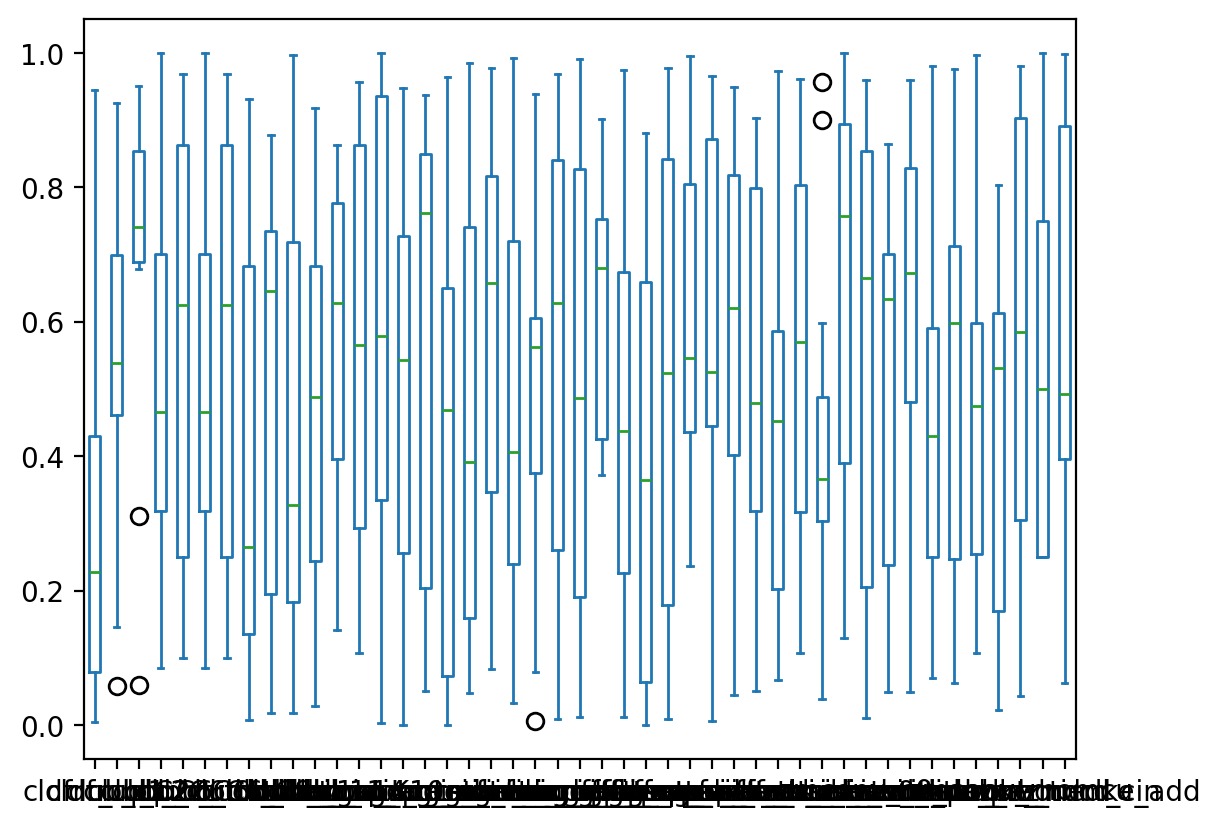

In [33]:
param_df_std.iloc[test_ensembles[0], :].plot.box()

In [34]:
param_df_std.columns

Index(['cldfrc_dp1', 'cldfrc_dp2', 'clubb_C2rt', 'clubb_C6rt', 'clubb_C6rtb',
       'clubb_C6thl', 'clubb_C6thlb', 'clubb_C8', 'clubb_beta', 'clubb_c1',
       'clubb_c11', 'clubb_c14', 'clubb_c_K10', 'clubb_gamma_coef',
       'clubb_wpxp_L_thresh', 'dust_emis_fact', 'micro_mg_accre_enhan_fact',
       'micro_mg_autocon_fact', 'micro_mg_autocon_lwp_exp',
       'micro_mg_autocon_nd_exp', 'micro_mg_berg_eff_factor', 'micro_mg_dcs',
       'micro_mg_effi_factor', 'micro_mg_homog_size', 'micro_mg_iaccr_factor',
       'micro_mg_max_nicons', 'micro_mg_vtrmi_factor',
       'microp_aero_npccn_scale', 'microp_aero_wsub_min',
       'microp_aero_wsub_scale', 'microp_aero_wsubi_min',
       'microp_aero_wsubi_scale', 'seasalt_emis_scale',
       'sol_factb_interstitial', 'sol_factic_interstitial', 'zmconv_c0_lnd',
       'zmconv_c0_ocn', 'zmconv_capelmt', 'zmconv_dmpdz', 'zmconv_ke',
       'zmconv_ke_lnd', 'zmconv_momcd', 'zmconv_momcu', 'zmconv_num_cin',
       'zmconv_tiedke_add'],
      

In [35]:
np.min(param_df_std['clubb_C2rt'])

0.0

In [36]:
np.max(param_df_std['clubb_C2rt'])

1.0

In [33]:
stacked_q95

<xarray.DataArray 'PREC' (x: 14484)> Size: 116kB
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
    quantile  float64 8B 0.95
  * x         (x) object 116kB MultiIndex
  * lat       (x) float64 116kB -77.75 -77.75 -77.75 ... 36.28 36.28 36.28
  * lon       (x) float64 116kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8

In [38]:
quant95_std_ratio.where(quant95_std_ratio == quant95_std_ratio.max(), drop = True).coords

Coordinates:
  * lat       (lat) float64 8B -8.01
  * lon       (lon) float64 8B 268.8
    quantile  float64 8B 0.95